# MLR Models for Milage of Car

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm #For Linear Regression Model
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split #For sepration o data into testSet & trainSet
from sklearn.metrics import mean_squared_error, r2_score #For evaluation model

In [2]:
#Reading Data
data = pd.read_csv("auto-mpg.data-original.txt",sep=" ",header=None,error_bad_lines=False,skipinitialspace=True)
data.head()

b'Skipping line 12: expected 10 fields, saw 11\nSkipping line 15: expected 10 fields, saw 11\nSkipping line 18: expected 10 fields, saw 11\nSkipping line 20: expected 10 fields, saw 11\nSkipping line 21: expected 10 fields, saw 11\nSkipping line 26: expected 10 fields, saw 11\nSkipping line 40: expected 10 fields, saw 11\nSkipping line 51: expected 10 fields, saw 11\nSkipping line 53: expected 10 fields, saw 11\nSkipping line 77: expected 10 fields, saw 11\nSkipping line 81: expected 10 fields, saw 11\nSkipping line 82: expected 10 fields, saw 11\nSkipping line 83: expected 10 fields, saw 11\nSkipping line 90: expected 10 fields, saw 12\nSkipping line 92: expected 10 fields, saw 11\nSkipping line 101: expected 10 fields, saw 11\nSkipping line 102: expected 10 fields, saw 11\nSkipping line 103: expected 10 fields, saw 11\nSkipping line 122: expected 10 fields, saw 11\nSkipping line 123: expected 10 fields, saw 11\nSkipping line 141: expected 10 fields, saw 11\nSkipping line 145: expecte

,0,1,2,3,4,5,6,7,8,9
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,"1.\t""chevrolet",chevelle,"malibu"""
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,"1.\t""buick",skylark,"320"""
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,"1.\t""plymouth","satellite""",NaN
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,"1.\t""amc",rebel,"sst"""
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,"1.\t""ford","torino""",NaN


### Pre-Processing Data

In [3]:
data['10']= str(data.iloc[:,7])+' '+str(data.iloc[:,8])+' '+str(data.iloc[:,9])

In [4]:
data.drop([7,8,9],axis=1,inplace=True)
data.columns=['M/G','Cylinders','Displacement','Hp','Weight','Accn','Model Year','Origin / Car Name']c

Text(0.5, 0.98, 'Mileage of Car wrt Cylinders,CC,Horse Power,Weight,Accelaration')

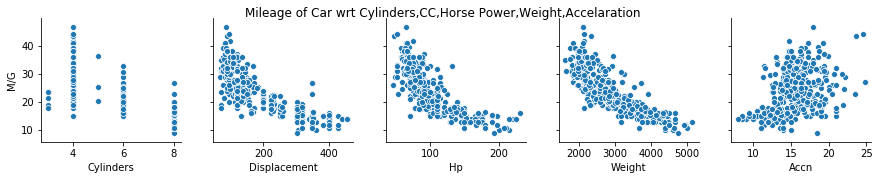

In [11]:
sns.pairplot(data,x_vars=['Cylinders','Displacement','Hp','Weight','Accn'],y_vars='M/G')
plt.suptitle('Mileage of Car wrt Cylinders,CC,Horse Power,Weight,Accelaration')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 8 columns):
M/G                  353 non-null float64
Cylinders            357 non-null float64
Displacement         357 non-null float64
Hp                   351 non-null float64
Weight               357 non-null float64
Accn                 357 non-null float64
Model Year           357 non-null float64
Origin / Car Name    357 non-null object
dtypes: float64(7), object(1)
memory usage: 22.4+ KB


In [6]:
data.fillna(method='ffill',inplace=True)

In [7]:
X = data.iloc[:,[1,2,3,4]].values
Y = data.iloc[:,0].values

In [8]:
X

array([[   8. ,  307. ,  130. , 3504. ,   12. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5],
       [   8. ,  318. ,  150. , 3436. ,   11. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6],
       [   4. ,  120. ,   79. , 2625. ,   18.6],
       [   4. ,  119. ,   82. , 2720. ,   19.4]])

In [9]:
Y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       15. , 15. , 15. , 14. , 15. , 22. , 18. , 21. , 27. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. , 26. ,
       24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. , 11. ,
       13. , 13. , 19. , 15. , 18. , 22. , 21. , 26. , 22. , 28. , 28. ,
       13. , 14. , 13. , 14. , 15. , 12. , 13. , 13. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 16. , 29. , 24. , 20. , 19. , 15. , 24. ,
       20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       18. , 16. , 14. , 29. , 26. , 26. , 31. , 32. , 28. , 24. , 26. ,
       24. , 26. , 31. , 19. , 18. , 15. , 15. , 16. , 15. , 16. , 14. ,
       17. , 16. , 15. , 18. , 21. , 20. , 13. , 29

## Spliting Data into Train & Test Sets

In [10]:
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,test_size=1/4,random_state=42)

## SKLearn Linear Regression Model

In [12]:
regsr = lm.LinearRegression()
regsr.fit(XTrain,YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
YPred = regsr.predict(XTest)

### Evaluating Model

In [14]:
RMSET = np.sqrt(mean_squared_error(YTest,YPred))
R2 = r2_score(YTest,YPred)

In [15]:
RMSET

4.678398441789438

In [16]:
R2

0.6732494113639422

## Stats Model OLS 

### Creating OLS Model

In [17]:
#With Constant Added
XTrain1 = sm.add_constant(XTrain)
olsmodel = sm.OLS(YTrain,XTrain1)#Yval First
prediction = olsmodel.fit()

### Evaluation Model

In [18]:
prediction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     127.8
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           4.68e-68
Time:                        19:24:19   Log-Likelihood:                -747.68
No. Observations:                 267   AIC:                             1507.
Df Residuals:                     261   BIC:                             1529.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.2202      3.029     16.250      0.000      43.256      55.185
x1             0.0336      0.506      0.066      0.947      -0.963       1.031
x2            -0.0087      0.011     -0.785      0.433      -0.030       0.013
x3            -0.0483      0.019     -2.496      0.013      -0.086      -0.010
x4            -0.0052      0.001     -5.210      0.000      -0.007      -0.003
x5            -0.2614      0.145     -1.797      0.073      -0.548       0.025
==============================================================================
Omnibus:                       13.026   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.455
Skew:                           0.455   Prob(JB):                     0.000726
Kurtosis:                       3.686   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#For Prediction
Y_PredOLS = prediction.predict(XTest)